<a href="https://colab.research.google.com/github/AndresRestrepoRodriguez/Emotional_Time_Series/blob/develop/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
sns.set()
sns.set_style("whitegrid")
#%matplotlib inline

In [ ]:
def process_datetime(dataframe_ts):
    dataframe_ts_processed = dataframe_ts.copy()
    dataframe_ts_processed["time_value"] = pd.to_datetime(dataframe_ts['time_value'], format='%Y-%m-%d %H:%M:%S.%f')
    dataframe_ts_processed.set_index(pd.DatetimeIndex(dataframe_ts_processed['time_value']), inplace=True)
    return dataframe_ts_processed

    
def process_activities(dataframe_ts):
    data_values = dataframe_ts.values
    print(data_values)
    zone_data = []
    previous_data = "-".join(data_values[0][10:])
    previous_datetime = data_values[0][2]
    i = 1
    while(True):
        if previous_data == "-".join(data_values[i][10:]):
            i += 1
        else:
            data_temp = [previous_data, previous_datetime, data_values[i][2]]
            zone_data.append(data_temp)
            previous_data = "-".join(data_values[i][10:])
            previous_datetime = data_values[i][2]
            i += 1
        
        if i == len(data_values)-1:
            data_temp = ["-".join(data_values[i][10:]), previous_datetime, data_values[i][2]]
            zone_data.append(data_temp)
            break
    return zone_data


def get_unique_activities(data_activities):
    unique_activities = [activity[0] for activity in data_activities]
    return unique_activities

In [ ]:
path_data = "/content/data_1secs_extra_exe.csv"

data = pd.read_csv(path_data)




metrics = ["engagement", "excitation", "stress", "relax", "interest", "focus"]
colors_metrics = {"engagement": "#BF2F21",
                  "excitation": "#EB9108",
                  "stress": "#C715CD",
                  "relax": "#75602A",
                  "interest": "#2037C6",
                  "focus": "#319B1A"}

dict_colores = {"VL-DNA": "#E8846E",
                        "TE-DNA": "#F1E58E",
                        "OP-ASSOC": "#8DD47A",
                        "OP-PRON": "#A09F90",
                        "OP-LIS": "#74BAEE",
                        "OP-JOIN": "#4083AF",
                        "OP-TRA": "#C574EE",
                        "OP-ORD": "#FD95DE",
                        "OP-DLG": "#FBA64C"}

data_ts = process_datetime(data)
activities = process_activities(data_ts)
unique_act = get_unique_activities(datos_zonas)

[['id_2' 'lesson_1' Timestamp('2021-06-13 18:33:25.933635') ...
  0.33560500000000004 'VL' 'DNA']
 ['id_2' 'lesson_1' Timestamp('2021-06-13 18:33:26.933635') ... 0.3301949
  'VL' 'DNA']
 ['id_2' 'lesson_1' Timestamp('2021-06-13 18:33:27.933635') ... 0.3247848
  'VL' 'DNA']
 ...
 ['id_2' 'lesson_1' Timestamp('2021-06-13 18:35:37.933635') ... 0.466409
  'OP' 'DLG']
 ['id_2' 'lesson_1' Timestamp('2021-06-13 18:35:38.933635') ... 0.466409
  'OP' 'DLG']
 ['id_2' 'lesson_1' Timestamp('2021-06-13 18:35:39.933635') ... 0.466409
  'OP' 'DLG']]


In [ ]:
dict_colores = {"VL-DNA": "#E8846E",
                        "TE-DNA": "#F1E58E",
                        "OP-ASSOC": "#8DD47A",
                        "OP-PRON": "#A09F90",
                        "OP-LIS": "#74BAEE",
                        "OP-JOIN": "#4083AF",
                        "OP-TRA": "#C574EE",
                        "OP-ORD": "#FD95DE",
                        "OP-DLG": "#FBA64C"}
        

In [ ]:
metrics = ["engagement", "excitation", "stress", "relax", "interest", "focus"]
colors_metrics = {"engagement": "#BF2F21",
                  "excitation": "#EB9108",
                  "stress": "#C715CD",
                  "relax": "#75602A",
                  "interest": "#2037C6",
                  "focus": "#319B1A"}

In [ ]:
def get_plot_ts(dataframe_ts, metrics_list, colors_metrics, zone_data, dict_colors, unique_actitivities):
    fig, ax = plt.subplots(figsize=(12, 7))
    for i in metrics_list:
                # Add x-axis and y-axis
                ax.plot(dataframe_ts.index.values,
                                dataframe_ts[i],
                                label=i,
                                color=colors_metrics.get(i))
    ax.set_title('Record Performance Metrics Participant Id. '+str(int(re.findall(r'\d+', dataframe_ts['user_id'].iloc[0])[0])+1)+' \nInteraction with lesson No. '+dataframe_ts['lesson'].iloc[0]+' - language: Portuguese\n', fontsize=16,fontweight='bold')
    ax.set_xlabel('Time', fontsize=14, fontweight='bold')
    ax.set_ylabel('Performance Metrics Values', fontsize=14, fontweight='bold')
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%M:%S"))
    lines = ax.get_lines()
    zones = list()
    for i in zone_data:
        zones.append(ax.axvspan(i[1], i[2], facecolor=dict_colors.get(i[0]), alpha=0.45))
        legend1 = plt.legend([line for line in lines], metrics_list, bbox_to_anchor=(1, 1), loc='upper left',prop={'size': 13})
    legend1.set_title("Metrics",prop={'size': 13, 'weight':'bold'}) 
    by_label = dict(zip(unique_actitivities, zones))
    legend2 = plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1, 0.25), loc='lower left',prop={'size': 13})
    legend2.set_title("Activities",prop={'size': 13, 'weight':'bold'}) 
    ax.add_artist(legend1)
    ax.add_artist(legend2)
    plt.gca().add_artist(legend1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.show()

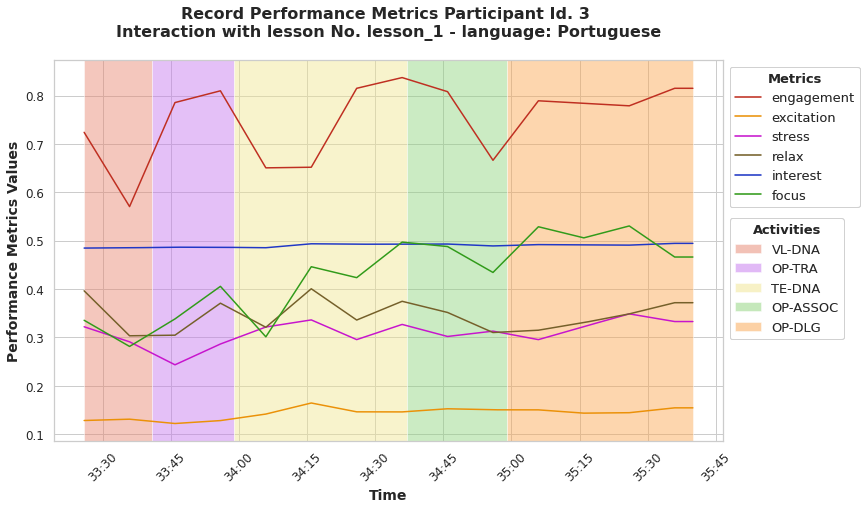

In [ ]:
plot_m = get_plot_ts(data_ts, metrics, colors_metrics, activities, dict_colores, unique_act)